In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [15]:
X = np.empty((100,2))
X[:,0] = np.random.uniform(0., 100., size = 100)
X[:,1] = 0.75 * X[:,0] +3. + np.random.normal(0., 10., size = 100)

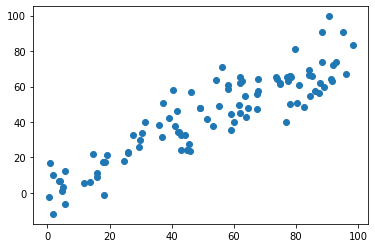

In [8]:
plt.scatter(X[:,0], X[:,1])
plt.show()

### Demean

In [6]:
def demean(X):
    return X - np.mean(X, axis = 0)

In [17]:
X_demean = demean(X)

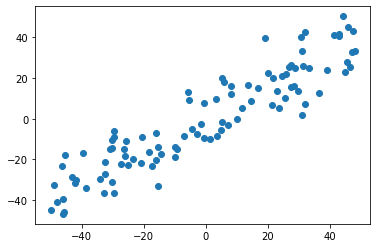

In [18]:
plt.scatter(X_demean[:,0], X_demean[:,1])
plt.show()

In [24]:
np.mean(X_demean[:,0])

5.968558980384841e-15

In [26]:
np.mean(X_demean[:,1])

4.547473508864641e-15

### 梯度上升法

In [27]:
def f(w, X):
    return np.sum((X.dot(w)**2)) / len(X)

In [31]:
def df_math(w, X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

In [56]:
def df_debug(w, X, epsilon=1e-4):
    res = np.empty(len(w))
    for i in range(len(w)):
        w_1 = w.copy()
        w_1[i] += epsilon
        w_2 = w.copy()
        w_2[i] -= epsilon
        res[i] = (f(w_1, X) - f(w_2, X)) / (2 * epsilon)
    return res

In [51]:
def direction(w):
    return w / np.linalg.norm(w)

def gradient_ascent(df, X, initial_w, eta, n_iters=1e4, epsilon=1e-8):
    
    w = direction(initial_w)
    cur_iter = 0 
    
    while cur_iter < n_iters:
        gradient = df(w, X)
        last_w = w 
        w = w + eta * gradient
        w = direction(w) #注意1：每一次需要单位向量
        
        if(abs(f(w, X) - f(last_w, X)) < epsilon):
            break

        cur_iter += 1 
    
    return w

In [37]:
initial_w = np.random.random(X.shape[1])#注意2：不能从0向量
initial_w    

array([0.68170616, 0.71976352])

In [39]:
eta = 0.001

In [40]:
#注意3：不能用standard scaler 归一化

In [57]:
gradient_ascent(df_debug, X_demean, initial_w, eta)

array([0.77536194, 0.63151711])

In [55]:
gradient_ascent(df_math, X_demean, initial_w, eta)

array([0.77536194, 0.63151711])

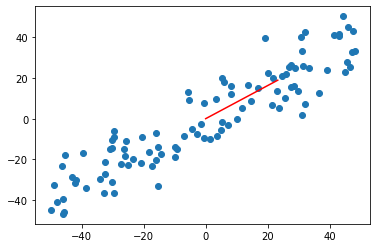

In [61]:
w = gradient_ascent(df_math, X_demean, initial_w, eta)

plt.scatter(X_demean[:, 0], X_demean[:, 1])
plt.plot([0, w[0]*30], [0, w[1]*30], color='r')
plt.show()

### 极端图解

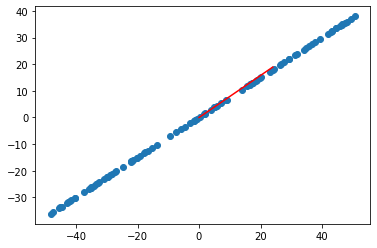

In [64]:
X2 = np.empty((100,2))
X2[:,0] = np.random.uniform(0., 100., size = 100)
X2[:,1] = 0.75 * X2[:,0] +3. 

X2_demean = demean(X2)
initial_w2 = np.random.random(X2.shape[1])#注意2：不能从0向量

eta = 0.001
w2 = gradient_ascent(df_math, X2_demean, initial_w2, eta)

plt.scatter(X2_demean[:, 0], X2_demean[:, 1])
plt.plot([0, w2[0]*30], [0, w[1]*30], color='r')
plt.show()